<a href="https://colab.research.google.com/github/FMurunga/Customer-Churn-Prediction/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Quick Overview**

1.   List item
2.   List item


Dataset: Telco_customer_churn.xslx from Kaggle(Datasource)

1.   *Data based on customer information and services provided to customers by a Fictional Telecommunications Company named 'Telco'*
2.   *Goal:Performing Exploratory Data Analysis and building a customer churn Prediction Model*





In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_excel('https://raw.github.com/FMurunga/DataScience-Projects/main/Telco_customer_churn.xlsx')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


Overview of the dataset

In [ ]:
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:
data.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [ ]:
data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [ ]:
#Note: Total charges is a numerical column but is presented as an object data type
#convert Total Charges Column from object type to float
data['Total Charges'] = pd.to_numeric(data['Total Charges'],errors = 'coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
data.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
data.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6530
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

Exploration Data Analysis
1.Customer Data Exploration

**1. Demographics Exploration : identify customer representation by demographics in the dataset i.e by gender,age range,partners and dependency according to the dataset.**

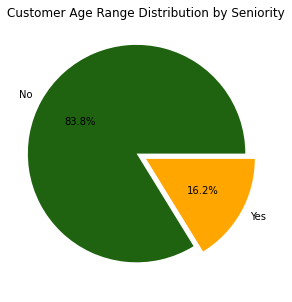

In [ ]:
#@title Explore customer data by seniority
#Explore customer data by seniority
explode = (0.1,0.0)
colors = ('#1f6310','#ffa600')
_, ax = plt.subplots(figsize=(5,5))
ax = (data['Senior Citizen'].value_counts()/len(data))\
.plot(kind='pie', autopct='%.1f%%', labels = ['No', 'Yes'],colors =colors,explode = explode)
ax.set_title("Customer Age Range Distribution by Seniority")
ax.set_ylabel('')
plt.show()

Only 16% of the customers in the dataset are senior citizens therefore the customers are mainly younger citizens

In [ ]:
age_count = data['Gender'].value_counts()
print(age_count)
age_count_percentage = data['Gender'].value_counts()*100/len(data)
age_count_percentage

Male      3555
Female    3488
Name: Gender, dtype: int64


Male      50.47565
Female    49.52435
Name: Gender, dtype: float64

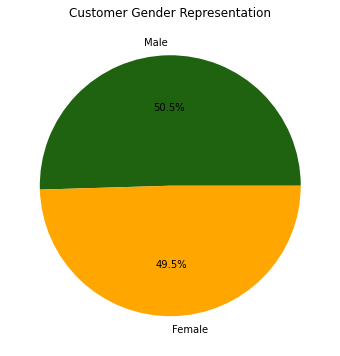

In [ ]:
#@title Customer Gender Distribution

colors = ('#1f6310','#ffa600')
_, ax = plt.subplots(figsize=(10,6))
ax = age_count_percentage\
.plot(kind='pie', autopct='%.1f%%',colors =colors)
ax.set_title("Customer Gender Representation")
ax.set_ylabel('')
plt.show()

**There is almost a balance in the gender representation of the customers with the male gender being slightly higher than females by 1%.**

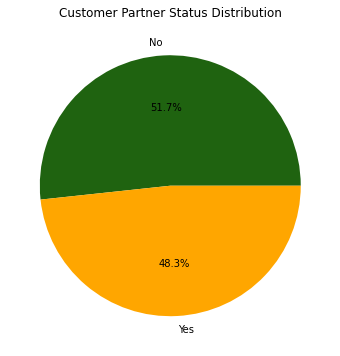

In [ ]:
#@title Partner Status Representation

partner_count_percentage = data['Partner'].value_counts()*100/len(data)

colors = ('#1f6310','#ffa600')
_, ax = plt.subplots(figsize=(10,6))
ax = partner_count_percentage\
.plot(kind='pie', autopct='%.1f%%',colors =colors)
ax.set_title("Customer Partner Status Distribution")
ax.set_ylabel('')
plt.show()

**52% of the customers do not have partners**

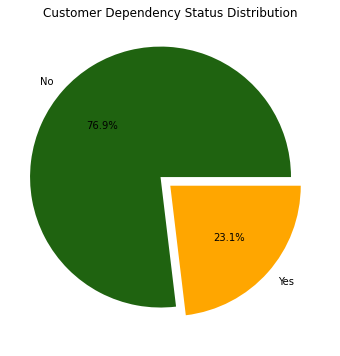

In [ ]:
#@title Customer Dependency Status Representation

dependent_count_percentage = data['Dependents'].value_counts()*100/len(data)
explode = (0.1,0.0)
colors = ('#1f6310','#ffa600')
_, ax = plt.subplots(figsize=(10,6))
ax = dependent_count_percentage\
.plot(kind='pie', autopct='%.1f%%',colors =colors, explode=explode)
ax.set_title("Customer Dependency Status Distribution")
ax.set_ylabel('')
plt.show()

**At least 77% of the Customers do not have dependents**

In [ ]:
#Partner and dependency status
dependents_partners = data.groupby(['Partner', 'Dependents']).size().unstack()
dependents_partners

Dependents,No,Yes
Partner,,
No,3339,302
Yes,2077,1325


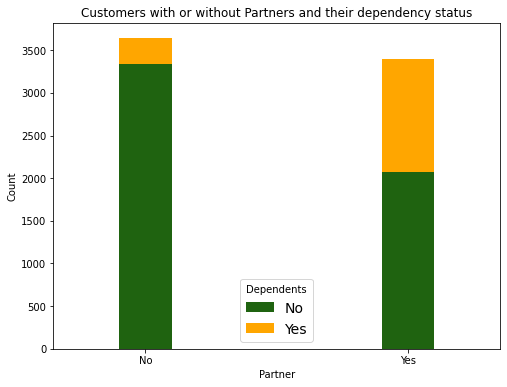

In [ ]:
colors = ('#1f6310','#ffa600')

ax = (dependents_partners.plot(kind='bar',width = 0.2,stacked = True,rot = 0,figsize = (8,6),color= colors))
ax.set_title("Customers with or without Partners and their dependency status")
ax.set_ylabel('Count')
ax.legend(prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_xlabel('Partner')
plt.show()

**Customers who have no partners have fewer dependents compared to those who have partners**

**2. Customer Account Information Exploration: explore customer tenure and contracts**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


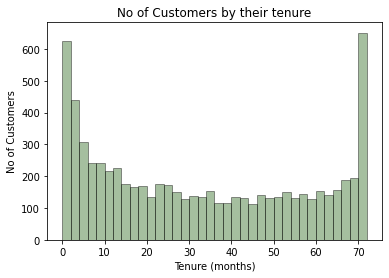

In [ ]:
#@title Explore Customer Tenure
ax= sns.distplot(data['Tenure Months'],hist=True, bins= int(180/5), color='#20610f',kde=False, hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('No of Customers by their tenure')
plt.show()

**From the above plot, A lot of customers have been with the company for just a month while also quite a bunch have been there for at least 72 months. The difference could be because different customers have different contracts with the company.**

In [ ]:
#Customer contracts
contract_counts = data['Contract'].value_counts()
contract_counts


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

Text(0.5, 1.0, 'Customers Representation by Contract Type')

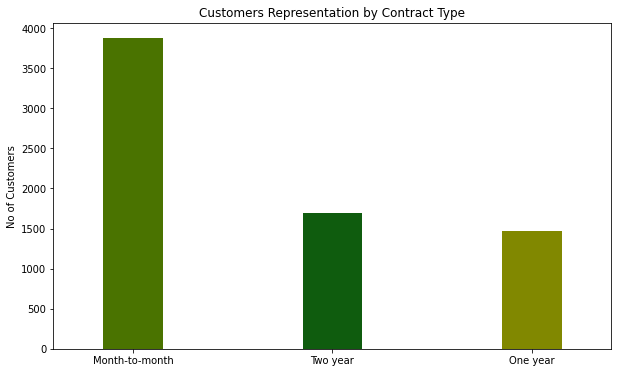

In [ ]:
#@title Explore Customer Contracts
colors ={'#0f5c0e','#4a7300','#818800','#bd9a00'}
ax = contract_counts.plot(kind = 'bar',rot = 0, width = 0.3, color= colors, figsize=(10,6))
ax.set_ylabel('No of Customers')
ax.set_title('Customers Representation by Contract Type')


**From the above plot, Most customers are based on a Month-to- Month Contract with the company and an almost equal number a on a 2-year and 1-year contract respectively**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Tenure by Two-year contract')

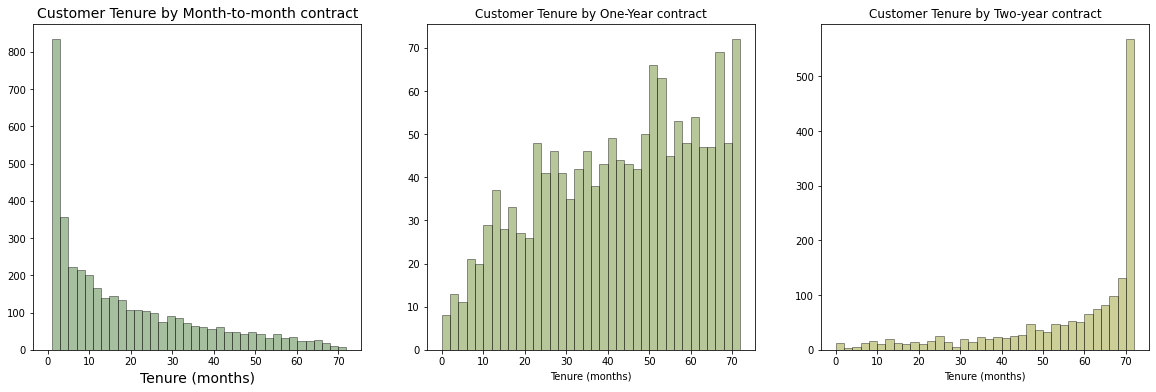

In [ ]:
#@title Explore Customer Tenure by their contracts
#Tenure of Customers by their Contracts
fig, axes = plt.subplots(nrows=1, ncols=3, sharex = True, 
                                  figsize = (20,6))

      #month-to-month contract Tenure
ax= sns.distplot(data[data['Contract']=='Month-to-month']['Tenure Months'],
                 hist=True, bins= int(180/5), color='#20610f',kde=False, 
                 hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, ax=axes[0])

ax.set_xlabel('Tenure (months)', size = 14)
ax.set_title('Customer Tenure by Month-to-month contract', size = 14)


      #One-year contract tenure plot
ax= sns.distplot(data[data['Contract']=='One year']['Tenure Months'],
                 hist=True, bins= int(180/5), color='#4e7300',kde=False,
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4},ax=axes[1])

ax.set_xlabel('Tenure (months)')
ax.set_title('Customer Tenure by One-Year contract')


      #Two-year contract tenure plot
ax= sns.distplot(data[data['Contract']=='Two year']['Tenure Months'],
                 hist=True, bins= int(180/5), color='#838800',
                 kde=False, hist_kws={'edgecolor':'#010300'},
             kde_kws={'linewidth': 4}, ax= axes[2])

ax.set_xlabel('Tenure (months)')
ax.set_title('Customer Tenure by Two-year contract')




In [ ]:
payment_methods_counts = data['Payment Method'].value_counts()
payment_methods_counts

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: Payment Method, dtype: int64

Text(0.5, 1.0, 'Customer Payment Methods Information')

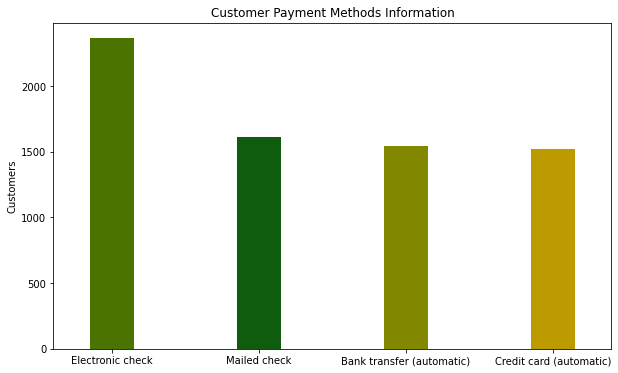

In [ ]:
#@title Explore Customer Payment Methods
colors ={'#0f5c0e','#4a7300','#818800','#bd9a00'}
ax = payment_methods_counts.plot(kind = 'bar',rot = 0, width = 0.3, color= colors, figsize=(10,6))
ax.set_ylabel('Customers')
ax.set_title('Customer Payment Methods Information')


**From the above plot: It shows that most customers on a month-to-month contract stay between 1-2months while most customers in a 2-year contract last up to 70 months**
***This depicts that customers taking the longer contracts are more loyal to the company for a longer period of time***

3. **Services Consumed by Customers within the Company**

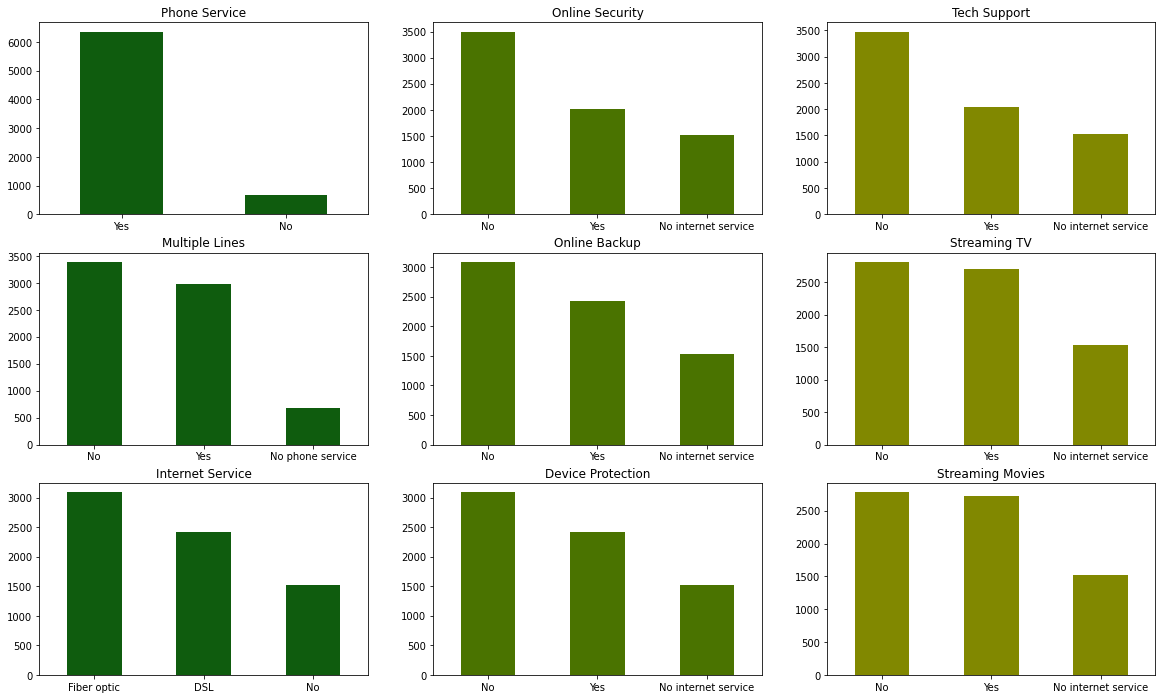

In [ ]:
Services_provided= ['Phone Service','Multiple Lines', 'Internet Service', 'Online Security',
                    'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies' ]
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,12))
#colors ={'#0f5c0e','#4a7300','#818800','#bd9a00'}
for i, item in enumerate(Services_provided):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0, color='#0f5c0e')
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0, color='#4a7300')
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0, color='#818800')
    ax.set_title(item)

**From the above plots: Phone Service has the highest number of customers**

Prepare Data for model training

In [ ]:
data.columns.values

array(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score',
       'CLTV', 'Churn Reason'], dtype=object)

In [ ]:
df1=data.drop(['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Label','Churn Score','Churn Reason'], axis='columns')
df1.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [ ]:
#Convert Categorical variables into dummy variables
dummies=pd.get_dummies(df1)
dummies.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,CLTV,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,3239,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,1,2701,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
2,8,99.65,820.50,1,5372,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
3,28,104.80,3046.05,1,5003,1,0,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,49,103.70,5036.30,1,5340,0,1,1,0,1,...,1,1,0,0,0,1,1,0,0,0


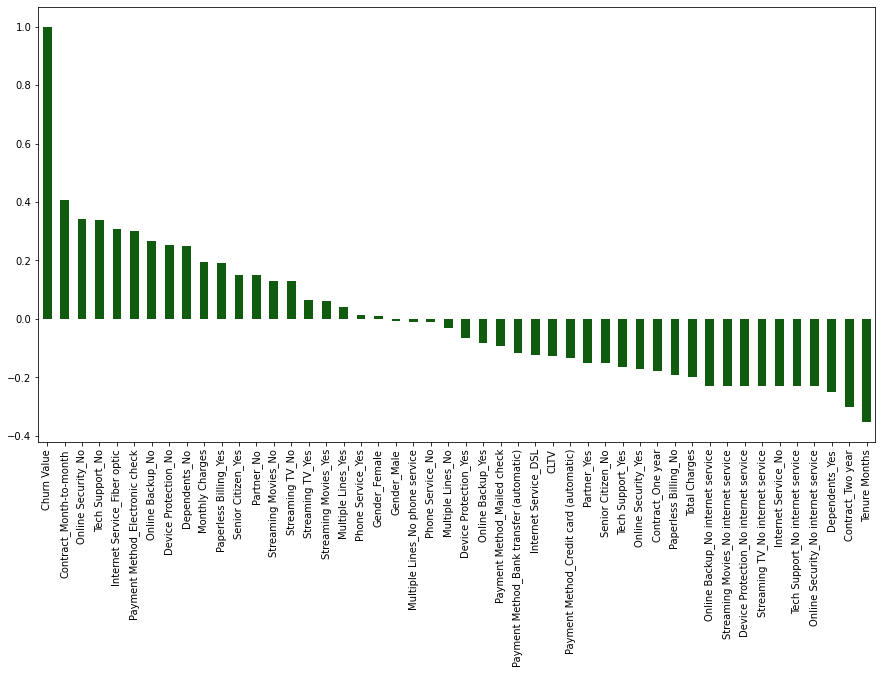

In [ ]:
#Get Correlation of "Churn" with other variables:
#colors ={'#0f5c0e','#4a7300','#818800','#bd9a00'}
plt.figure(figsize=(15,8))
dummies.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar',color='#0f5c0e')

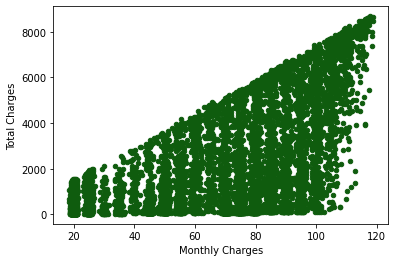

In [ ]:
dummies[['Monthly Charges', 'Total Charges']].plot.scatter(x = 'Monthly Charges', y='Total Charges',color = '#0f5c0e')

**Observation: Total charges increases as Monthly charges increase**



**Explore Churn Rate in relation with other features: **Explore the Target variable('Churn Value') in relation to other important features 

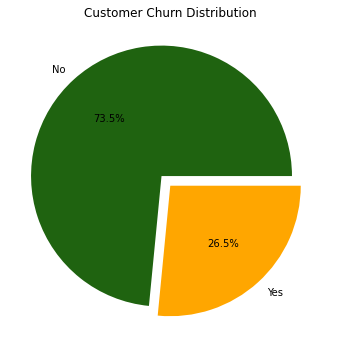

In [ ]:
#@title Customer Churn Rate
#Target Variable Exploration
colors = ('#1f6310','#ffa600')
explode = (0.1,0.0)
_, ax = plt.subplots(figsize=(10,6))
data.groupby("Churn Label").size().plot(kind='pie', autopct='%1.1f%%', colors = colors, explode=explode)
ax.set_title("Customer Churn Distribution")
ax.set_ylabel('')
plt.show()

74% of the customers did not churn.

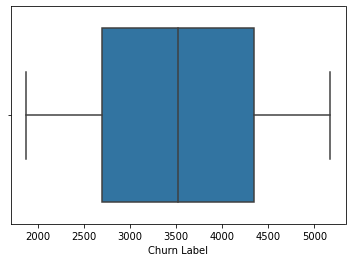

In [ ]:
#boxplot:skewness of the data
customer_churn_counts = data['Churn Label'].value_counts()
customer_churn_counts
sns.boxplot(x=customer_churn_counts,data=data)

The customer data is positively skewed. This is good

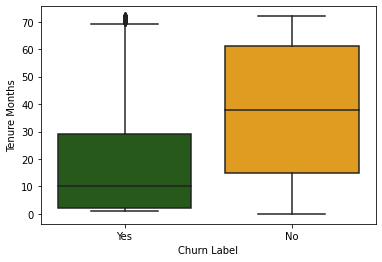

In [ ]:
#@title Churn rate by tenure
colors = {'#1f6310','#ffa600'}
sns.boxplot(x=data['Churn Label'],y=data['Tenure Months'],palette=colors)


**Customers who do not churn have a longer tenure with the company**

In [ ]:
#Churn vs contract
contract_churn = data.groupby(['Contract', 'Churn Label']).size().unstack()
contract_churn

Churn Label,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


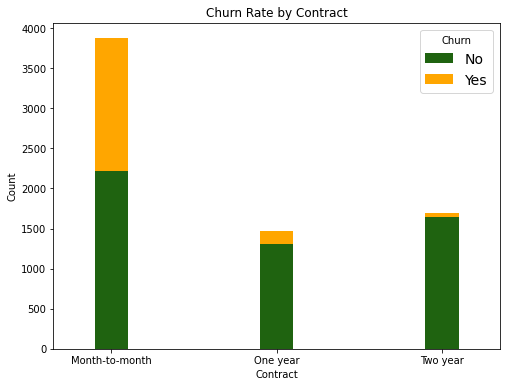

In [ ]:
#@title Churn Rate by Contract Type
colors = ('#1f6310','#ffa600')

ax = (contract_churn.plot(kind='bar',width = 0.2,stacked = True,rot = 0,figsize = (8,6),color= colors))
ax.set_title("Churn Rate by Contract")
ax.set_ylabel('Count')
ax.legend(prop={'size':14},title = 'Churn',fontsize =14)
ax.set_xlabel('Contract')
plt.show()


**Customers on a month-to-month contract have a higher churn rate compared to customers on long-term contracts**

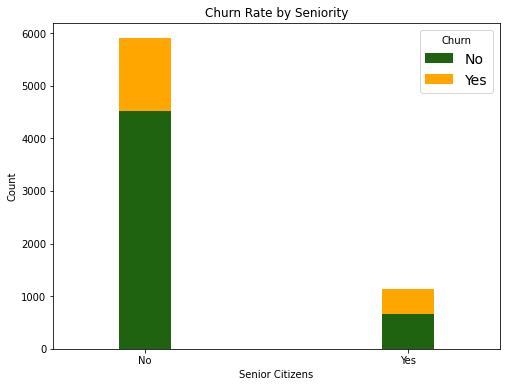

In [ ]:
#@title Churn Rate by Seniority
#Churn Vs Seniority
seniority_churn = data.groupby(['Senior Citizen', 'Churn Label']).size().unstack()

colors = ('#1f6310','#ffa600')

ax = (seniority_churn.plot(kind='bar',width = 0.2,stacked = True,rot = 0,figsize = (8,6),color= colors))
ax.set_title("Churn Rate by Seniority")
ax.set_ylabel('Count')
ax.legend(prop={'size':14},title = 'Churn',fontsize =14)
ax.set_xlabel('Senior Citizens')
plt.show()


**Younger citizens churn rate is a bit higher compared to senior citizens: this observation may be a bit biased because from initial analysis, Young citizens represent at least 80% of the data**

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

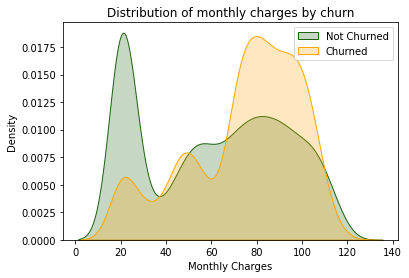

In [ ]:
#@title Churn Rate by Monthly Charges
ax = sns.kdeplot(data['Monthly Charges'][(data["Churn Label"] == 'No') ],
                color='#1f6310', shade = True)
ax = sns.kdeplot(data['Monthly Charges'][(data["Churn Label"] == 'Yes') ],
                ax =ax, color='#ffa600', shade= True)
ax.legend(["Not Churned","Churned"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')


**Churn Rate increases as Monthly charges increase.**

Text(0.5, 1.0, 'Distribution of Total charges by churn')

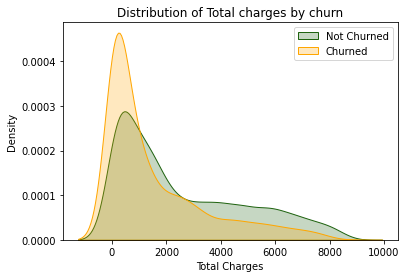

In [ ]:
#@title Churn Rate by Total Charges
ax = sns.kdeplot(data['Total Charges'][(data["Churn Label"] == 'No') ],
                color='#1f6310', shade = True)
ax = sns.kdeplot(data['Total Charges'][(data["Churn Label"] == 'Yes') ],
                ax =ax, color='#ffa600', shade= True)
ax.legend(["Not Churned","Churned"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of Total charges by churn')

**Observation: The Churn Rate is higher when total charges are lower**

**Data Preparation**

In [ ]:
#check for missing data
dummies.isnull().sum()

Tenure Months                                0
Monthly Charges                              0
Total Charges                               11
Churn Value                                  0
CLTV                                         0
Gender_Female                                0
Gender_Male                                  0
Senior Citizen_No                            0
Senior Citizen_Yes                           0
Partner_No                                   0
Partner_Yes                                  0
Dependents_No                                0
Dependents_Yes                               0
Phone Service_No                             0
Phone Service_Yes                            0
Multiple Lines_No                            0
Multiple Lines_No phone service              0
Multiple Lines_Yes                           0
Internet Service_DSL                         0
Internet Service_Fiber optic                 0
Internet Service_No                          0
Online Securi

In [ ]:
#replace missing values
total_charges_mean= dummies['Total Charges'].mean()
dummies['Total Charges'].fillna(total_charges_mean, inplace=True)

In [ ]:
dummies.isnull().sum()

Tenure Months                               0
Monthly Charges                             0
Total Charges                               0
Churn Value                                 0
CLTV                                        0
Gender_Female                               0
Gender_Male                                 0
Senior Citizen_No                           0
Senior Citizen_Yes                          0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
Phone Service_No                            0
Phone Service_Yes                           0
Multiple Lines_No                           0
Multiple Lines_No phone service             0
Multiple Lines_Yes                          0
Internet Service_DSL                        0
Internet Service_Fiber optic                0
Internet Service_No                         0
Online Security_No                

In [ ]:
#Define data
y = dummies['Churn Value'].values
x = dummies.drop(columns = ['Churn Value'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=0, test_size=0.2)

In [ ]:
x_train.isnull().any()
#np.isnan(y)

Tenure Months                               False
Monthly Charges                             False
Total Charges                               False
CLTV                                        False
Gender_Female                               False
Gender_Male                                 False
Senior Citizen_No                           False
Senior Citizen_Yes                          False
Partner_No                                  False
Partner_Yes                                 False
Dependents_No                               False
Dependents_Yes                              False
Phone Service_No                            False
Phone Service_Yes                           False
Multiple Lines_No                           False
Multiple Lines_No phone service             False
Multiple Lines_Yes                          False
Internet Service_DSL                        False
Internet Service_Fiber optic                False
Internet Service_No                         False


**Model Training**

In [ ]:
#@title 1. KNN Classifier: 81.61% performance
from sklearn.neighbors import KNeighborsClassifier
model =KNeighborsClassifier(n_neighbors=5)
knn= model.fit(x_train,y_train)

y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score
print("Training Score:\n",knn.score(x_train,y_train)*100)


Training Score:
 81.61164359247425


In [ ]:
#@title 2. Logistic Regression:81.51% performance
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score

print("Training Score:\n",lr.score(x_train,y_train)*100)


Training Score:
 81.5051473198438


In [ ]:
#@title 3. Decision Tree Classifier: 81.20% performance
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6,random_state=123, criterion='entropy')

#fit the model
dtree.fit(x_train,y_train)

#test the model
y_pred=dtree.predict(x_test)
from sklearn.metrics import accuracy_score

print('Training score is: \n', dtree.score(x_train,y_train)*100)

Training score is: 
 81.20340788072417


In [ ]:
#@title 4. Random Forest Regressor: 90.22% performance
from sklearn.ensemble import RandomForestRegressor
rf_model= RandomForestRegressor()

#fit the model
rf_model.fit(x_train,y_train)

#test the model
y_pred=rf_model.predict(x_test)
from sklearn.metrics import accuracy_score

print('Training score is: \n', rf_model.score(x_train,y_train)*100)

Training score is: 
 90.2300571230381


In [ ]:
#@title 4. Gradient Boosting Regressor: 40.71% performance
from sklearn.ensemble import GradientBoostingRegressor
gbc_model= GradientBoostingRegressor()

#fit the model
gbc_model.fit(x_train,y_train)

#test the model
y_pred=rf_model.predict(x_test)
from sklearn.metrics import accuracy_score

print('Training score is: \n', gbc_model.score(x_train,y_train)*100)

Training score is: 
 40.71071003391877


**Random Forest Regressor is the best performing model with an accuracy of 90.22%**

In [ ]:
predictions = rf_model.predict(x_test)
print('Model Predictions', predictions)
print('Expected', y_test)

Model Predictions [0.55 0.37 0.41 ... 0.03 0.05 0.04]
Expected [0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import r2_score
print('R Squared is', r2_score(y_test,predictions))

R Squared is 0.2562114363726713
